In [116]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# Ejercicio 5

El agua de un lago de zonas templadas puede dividirse en estratos térmicos. Cerca de la superficie el agua es
tibia y liviana (epilimnion) y en el fondo más fría y densa (hipolimnion). Lo mismo sucede en reactores
químicos. Ambas capas están separadas, aproximadamente, por un plano conocido por thermocline, donde la
derivada segunda de la temperatura respecto de la profundidad se hace cero (o la derivada primera tiene su
máximo). A esta profundidad el flujo de calor de la superficie al fondo de la capa se puede calcular con la ley de
Fourier, J=−k
dT
dz . Dados los datos de la tabla siguiente, correspondientes a la temperatura del líquido de
un reactor en función de la profundidad y usando el método de splines, realice un ajuste de la temperatura en
función de la profundidad y de su derivada. Encuentre la posición aproximada de la thermocline y calcule el
flujo de calor a través de la interfaz (tome k=0.01 cal(s. cmºC) )


In [117]:
z,t = np.loadtxt("datos", unpack=True)
n=len(z)

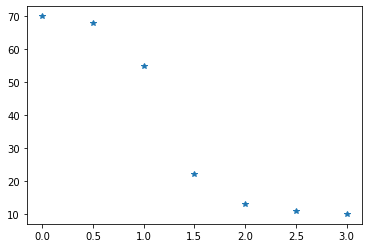

In [118]:
plt.plot(z,t, "*")

In [119]:
H=[]
D=np.zeros(n)
M=np.zeros([n,n])

In [120]:
for i in range(n-1):
    H.append(z[i+1]-z[i])

In [121]:
for i in range(1, n-1):
    M[i, i-1]=H[i-1]
    M[i,i] = 2* (H[i]+H[i-1])
    M[i, i+1]=H[i]
    D[i]= (t[i+1]-t[i])/H[i]  - (t[i]-t[i-1])/H[i-1]
M[0,0]=1
M[n-1,n-1]=1
D=np.array(D)*3

In [122]:
b=np.linalg.solve(M,D)

In [123]:
a = []
c = []
d = []
for i in range(len(b)-1):
    a.append((b[i+1]-b[i])/(3*H[i]))
    c.append((( (t[i+1]-t[i]) / H[i]) -(b[i]*H[i])-(a[i]*(H[i]**2))))
    d.append(t[i])

In [124]:
c

[-1.830769230769231,
 -8.338461538461537,
 -54.815384615384616,
 -48.400000000000006,
 -3.584615384615386,
 -3.261538461538461]

In [125]:
b=b[:len(b)-1]
P = [np.array(a),b,np.array(c),np.array(d)]

In [126]:
P=np.array(P)
p=np.zeros([len(P[0]), 4])
for j in range(4):
    p[0][j]=P[j][0]
    p[1][j]=P[j][1]
    p[2][j]=P[j][2]
    p[3][j]=P[j][3]
    p[4][j]=P[j][4]
    p[5][j]=P[j][5]

P(z-z[i])

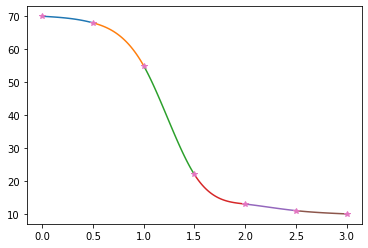

In [127]:
for i in range(len(P[0])):
    x=np.linspace(z[i],z[i+1],80)
    plt.plot(x, np.polyval( p[i] , x-z[i] ) )
plt.plot(z,t, "*")

In [128]:
p

array([[ -8.67692308,   0.        ,  -1.83076923,  70.        ],
       [-44.61538462, -13.01538462,  -8.33846154,  68.        ],
       [115.13846154, -79.93846154, -54.81538462,  55.        ],
       [-63.93846154,  92.76923077, -48.4       ,  22.        ],
       [  4.61538462,  -3.13846154,  -3.58461538,  13.        ],
       [ -2.52307692,   3.78461538,  -3.26153846,  11.        ]])

In [129]:
p1=copy.copy( p[:, :3] )

In [130]:
p1[:,0]=p1[:,0]*3

In [131]:
p1[:,1]=p1[:,1]*2

In [132]:
p1

array([[ -26.03076923,    0.        ,   -1.83076923],
       [-133.84615385,  -26.03076923,   -8.33846154],
       [ 345.41538462, -159.87692308,  -54.81538462],
       [-191.81538462,  185.53846154,  -48.4       ],
       [  13.84615385,   -6.27692308,   -3.58461538],
       [  -7.56923077,    7.56923077,   -3.26153846]])

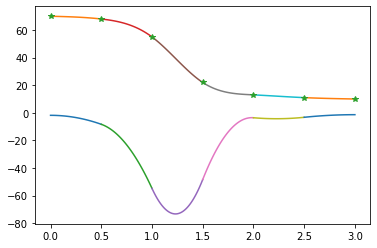

In [145]:
Pol=[]
X=[]
for i in range(len(P[0])):
    x=np.linspace(z[i],z[i+1],80)
    pol1=np.polyval( p1[i] , x-z[i] )
    plt.plot(x, pol1 )
    plt.plot(x, np.polyval( p[i] , x-z[i] ) )
    Pol.append(pol1)
    X.append(x)
plt.plot(z,t, "*")

In [142]:
min(np.array(Pol).ravel())

-73.31269397162684

In [147]:
B= np.array(X).ravel()

In [149]:
I = np.argmin(np.array(Pol).ravel())

In [150]:
B[I]

1.2341772151898733